#scscsd

In [8]:
# Snake RL Evaluation Analysis
# This notebook compares PPO vs A2C models across
# both personas: survivor and hunter.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Configuration
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if not os.path.exists(os.path.join(ROOT_DIR, "logs/snake/eval")):
    ROOT_DIR = os.getcwd()

EVAL_DIR = os.path.join(ROOT_DIR, "logs/snake/eval")
PLOT_DIR = os.path.join(ROOT_DIR, "plots/snake")
os.makedirs(PLOT_DIR, exist_ok=True)

print("📁 Current working directory:", os.getcwd())
print("🔍 Using root directory:", ROOT_DIR)
print("📊 Loading evaluation data from:", EVAL_DIR)

📁 Current working directory: d:\4th year\fallSem\Topics in CS I\sokoban-assgn\notebooks
🔍 Using root directory: d:\4th year\fallSem\Topics in CS I\sokoban-assgn
📊 Loading evaluation data from: d:\4th year\fallSem\Topics in CS I\sokoban-assgn\logs/snake/eval


In [9]:

# Load evaluation data
csv_files = [os.path.join(EVAL_DIR, f) for f in os.listdir(EVAL_DIR) if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError(f"No eval CSVs found in {EVAL_DIR}. Please run eval_snake.py first.")

print(f"✅ Found {len(csv_files)} CSV files:")
for f in csv_files:
    print(" -", os.path.basename(f))

dfs = []
for path in csv_files:
    df = pd.read_csv(path)
    df["filename"] = os.path.basename(path)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print("\n✅ Combined dataset shape:", data.shape)
display(data.head())

✅ Found 4 CSV files:
 - a2c_snake_hunter_eval.csv
 - a2c_snake_survivor_eval.csv
 - ppo_snake_hunter_eval.csv
 - ppo_snake_survivor_eval.csv

✅ Combined dataset shape: (200, 8)


,episode,algo,persona,reward,score,steps,mean_reward_per_step,filename
0,1,a2c,hunter,-10.8,0,5,-2.1600,a2c_snake_hunter_eval.csv
1,2,a2c,hunter,-11.0,0,6,-1.8333,a2c_snake_hunter_eval.csv
2,3,a2c,hunter,-11.0,0,6,-1.8333,a2c_snake_hunter_eval.csv
3,4,a2c,hunter,-11.0,0,6,-1.8333,a2c_snake_hunter_eval.csv
4,5,a2c,hunter,4.0,1,6,0.6667,a2c_snake_hunter_eval.csv


In [10]:
# Compute summary stats

summary = (
    data.groupby(["algo", "persona"])
    .agg(
        mean_reward=("reward", "mean"),
        mean_score=("score", "mean"),
        mean_steps=("steps", "mean"),
        mean_efficiency=("mean_reward_per_step", "mean"),
        reward_std=("reward", "std"),
        score_std=("score", "std"),
    )
    .reset_index()
)

print("\n📊 Summary Table:")
display(summary)



📊 Summary Table:


,algo,persona,mean_reward,mean_score,mean_steps,mean_efficiency,reward_std,score_std
0,a2c,hunter,-9.48400,0.10,5.92,-1.691300,4.478172,0.303046
1,a2c,survivor,231.91016,19.02,325.12,0.719694,81.312064,6.399904
2,ppo,hunter,306.82800,26.12,375.86,0.834950,90.820631,7.547509
3,ppo,survivor,256.55256,21.56,200.80,1.294668,79.860756,6.443348


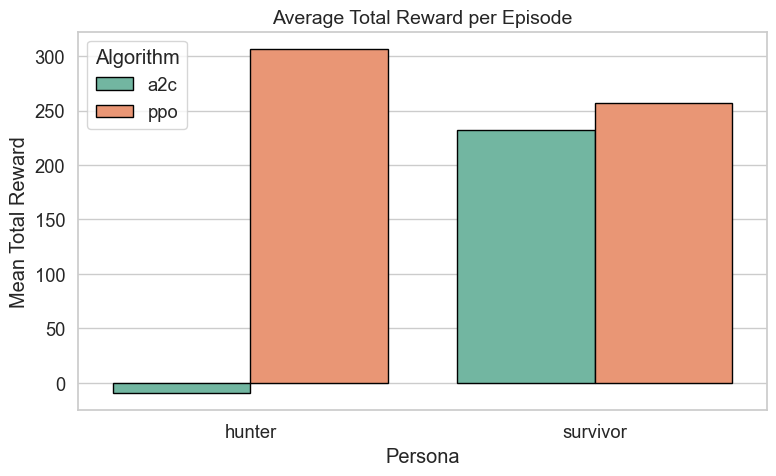

In [11]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# 1. Mean Reward Comparison
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_reward",
    hue="algo",
    edgecolor="black",
    palette="Set2"
)
plt.title("Average Total Reward per Episode", fontsize=14)
plt.ylabel("Mean Total Reward")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "mean_reward_comparison.png"))
plt.show()

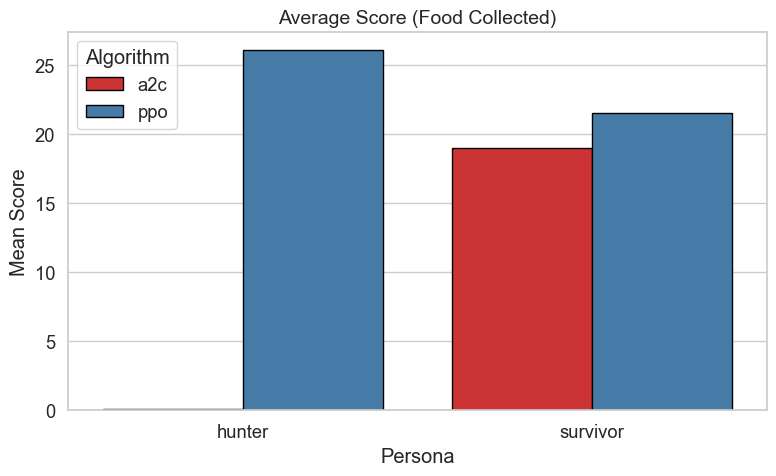

In [12]:
# 2. Mean Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_score",
    hue="algo",
    edgecolor="black",
    palette="Set1"
)
plt.title("Average Score (Food Collected)", fontsize=14)
plt.ylabel("Mean Score")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "mean_score_comparison.png"))
plt.show()

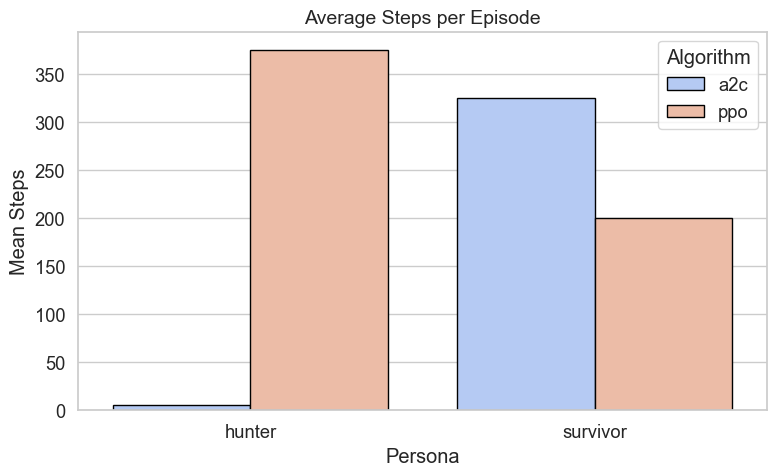

In [13]:
# 3. Steps Survived
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_steps",
    hue="algo",
    edgecolor="black",
    palette="coolwarm"
)
plt.title("Average Steps per Episode", fontsize=14)
plt.ylabel("Mean Steps")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "steps_comparison.png"))
plt.show()


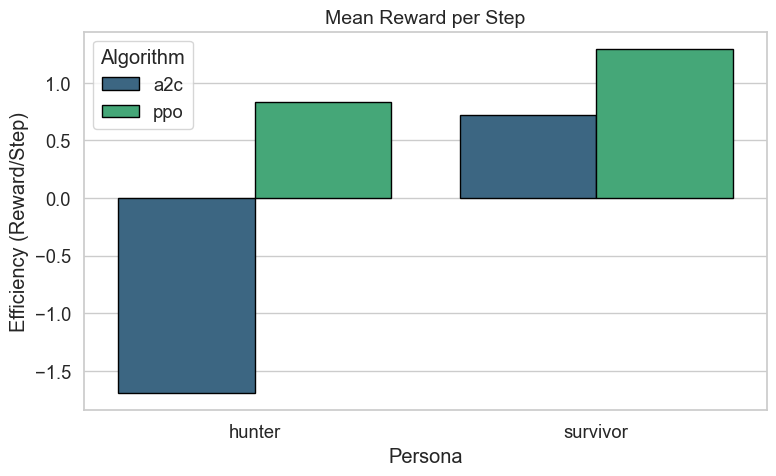

In [14]:
# 4. Reward Efficiency (Reward per Step)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_efficiency",
    hue="algo",
    edgecolor="black",
    palette="viridis"
)
plt.title("Mean Reward per Step", fontsize=14)
plt.ylabel("Efficiency (Reward/Step)")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "efficiency_comparison.png"))
plt.show()

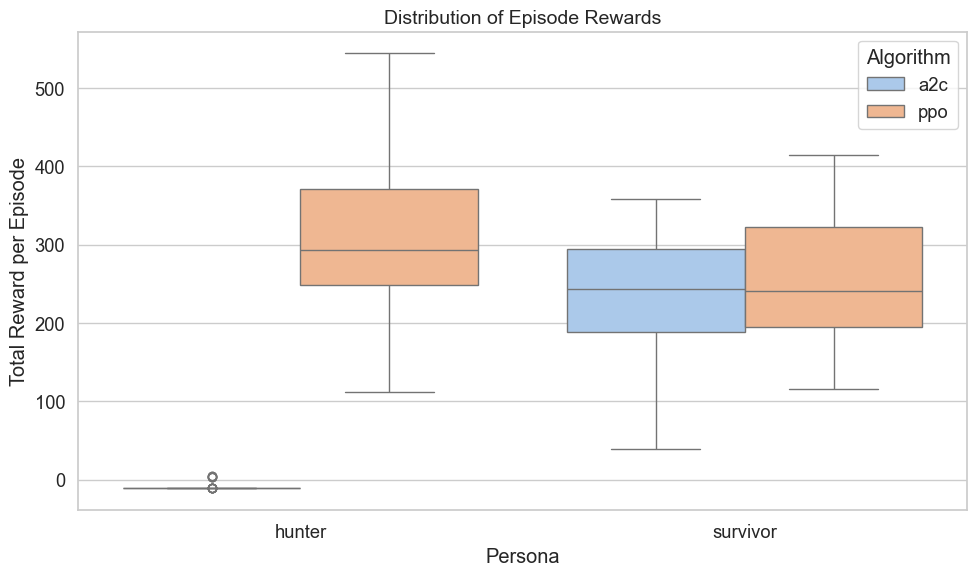

In [15]:
# 5. Reward Distribution (Episode-level spread)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="persona",
    y="reward",
    hue="algo",
    palette="pastel"
)
plt.title("Distribution of Episode Rewards", fontsize=14)
plt.ylabel("Total Reward per Episode")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "reward_distribution.png"))
plt.show()

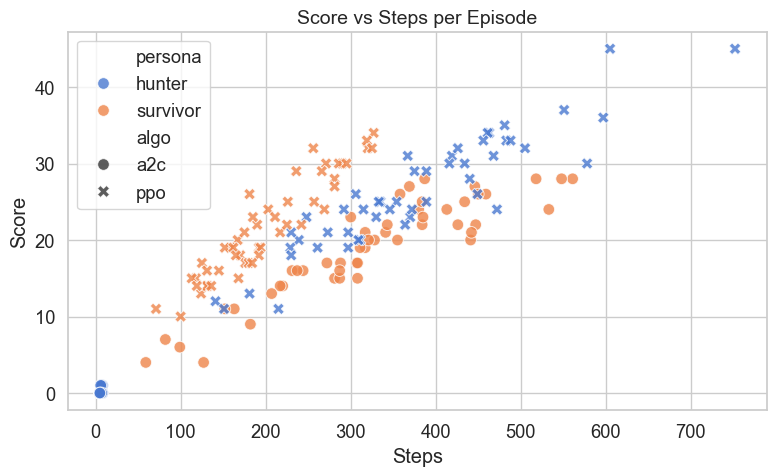

In [16]:
# 6. Score vs Steps Relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x="steps",
    y="score",
    hue="persona",
    style="algo",
    alpha=0.8,
    s=70
)
plt.title("Score vs Steps per Episode", fontsize=14)
plt.xlabel("Steps")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "score_vs_steps.png"))
plt.show()

C:\Users\mathu\AppData\Local\Temp\ipykernel_17900\3004635612.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


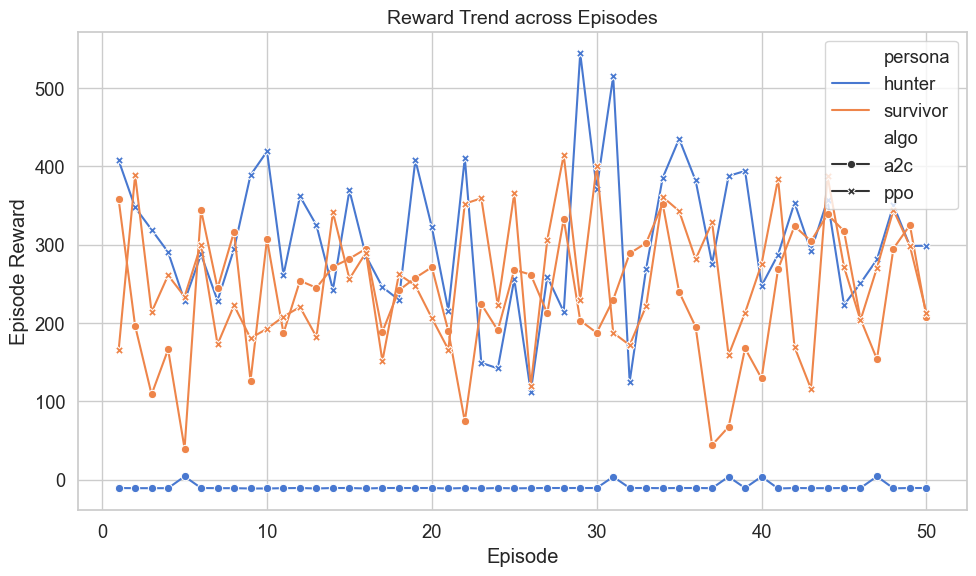

In [17]:
# 🔁 7. Reward Trend per Episode
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data,
    x="episode",
    y="reward",
    hue="persona",
    style="algo",
    markers=True,
    dashes=False,
    estimator="mean",
    ci="sd"
)
plt.title("Reward Trend across Episodes", fontsize=14)
plt.ylabel("Episode Reward")
plt.xlabel("Episode")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "reward_trend_per_episode.png"))
plt.show()
